 
 <center><img src="images/pydata-logo-warsaw-2017.png" width=1000px></center>

# Analysing flight safety data with Python

###### Jesús Martos & Alejandro Sáez

<center><img src="images/travel_by_plane.jpg" width=1000px></center>

## Scared to flight?
<center><img src="images/scared_to_flight.jpg" width=1000px></center>

## Sometimes things go wrong...
<center><img src="images/engine_surge.jpg" width=1000px></center>

## But it does not always end up that bad...

<center><img src="images/no-landing-gear.png" width=1000px></center>

[https://www.ainonline.com/aviation-news/2011-11-02/warsaw-airport-reopens-after-lot-gear-landing](https://www.ainonline.com/aviation-news/2011-11-02/warsaw-airport-reopens-after-lot-gear-landing)

<center><img src="images/bird_strike.png" width=1000px></center>

[https://www.thesun.co.uk/news/4543186/bird-strike-boeing-737-sudan/](https://www.thesun.co.uk/news/4543186/bird-strike-boeing-737-sudan/)

<center><img src="images/hudson-plane.jpg" width=1000px></center>

[https://en.wikipedia.org/wiki/US_Airways_Flight_1549](https://en.wikipedia.org/wiki/US_Airways_Flight_1549)

## Analysing flight safety data with Python

<center><img src="images/analytics.jpg" width=1000px></center>

## Who are these guys?


##### Jesús Martos & Alex Sáez
* Aerospace engineers
* AeroPython
* Passionate about scientific programming and data analysis
* Helicopter Simulators  / Aircraft Flight Test 

<center><img src="images/aeropython_logo.png" width=100></center>





## Data Source

<img src="./images/ntsb.jpg" style="width: 150px;"/>

__National Transportation Safety Board__
* determining the probable cause of accidents
* promoting transportation safety
* assisting victims of transportation accidents and their families


**AND THEY PUBLISH RAW DATA!**: http://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

from ipywidgets import interact
from IPython import display

from flight_safety.queries import (get_events_accidents, 
        get_aircrafts_accidents, get_occurrences_accidents,
        get_seq_of_events_accidents, get_flight_time_accidents,get_events_all, get_aircrafts_all,
        get_flight_crew_accidents)



In [2]:
mpl.rcParams['figure.figsize'] = 10, 6

mpl.rcParams['font.size'] = 20

con = sqlite3.connect('data/avall.db')

events = get_events_accidents(con)

aircraft = get_aircrafts_accidents(con)

occurrences = get_occurrences_accidents(con)

seq_of_events = get_seq_of_events_accidents(con)

flight_time = get_flight_time_accidents(con)

events_all = get_events_all(con)

aircraft_all = get_aircrafts_all(con)

aircraft_events_all = pd.merge(aircraft_all, events_all, right_index = True, left_on ='ev_id')

cond_incid = aircraft_events_all['ev_type'] == 'INC'
cond_accd  = aircraft_events_all['ev_type'] == 'ACC'
cond_far  = aircraft_events_all.far_part.isin(['121 ', '125 '])

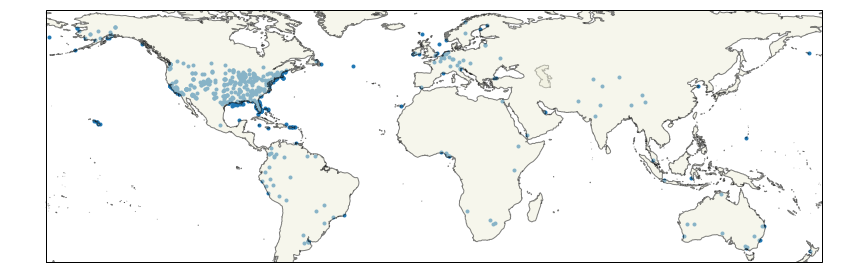

In [3]:
fig = plt.figure(figsize=(15,20))
# Elegimos la proyección PlateCarree
ax1 = plt.axes(projection=ccrs.PlateCarree())
# Y representamos las líneas de costa
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='50m')
ax1.add_feature(coastline, facecolor=cfeature.COLORS['land'], edgecolor='k', alpha=0.5)

ax1.scatter(aircraft_events_all[cond_incid].longitude,
                aircraft_events_all[cond_incid].latitude, 
                marker = '.')

## Let's start having a look at the data 

## Incident
<div class="alert alert-warning">
<strong></strong>
Something that affect or could affect the safety of operation. 
</div>

## Accident
<div class="alert alert-danger">
  <strong></strong>
  <ol type="a">
  <li>a person is fatally or seriously injured</li>
  <li>the aircraft sustains damage or structural failure</li>
  <li>the aircraft is missing or is completely inaccessible</li>
</ol>
</div>

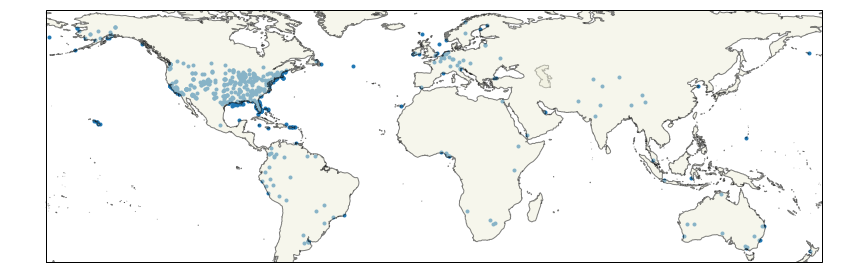

In [4]:
display.display(fig)

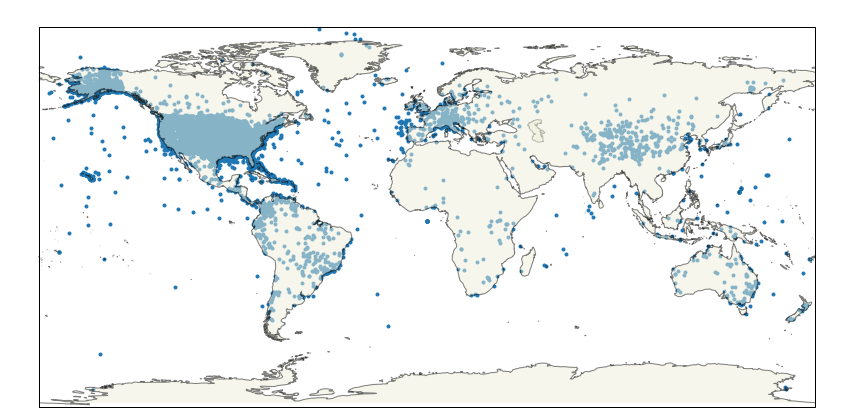

In [5]:
fig = plt.figure(figsize=(15,20))
# Elegimos la proyección PlateCarree
ax2 = plt.axes(projection=ccrs.PlateCarree())
# Y representamos las líneas de costa
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='50m')
ax2.add_feature(coastline, facecolor=cfeature.COLORS['land'], edgecolor='k', alpha=0.5)

ax2.scatter(aircraft_events_all[cond_accd].longitude,
                aircraft_events_all[cond_accd].latitude, 
                marker = '.')

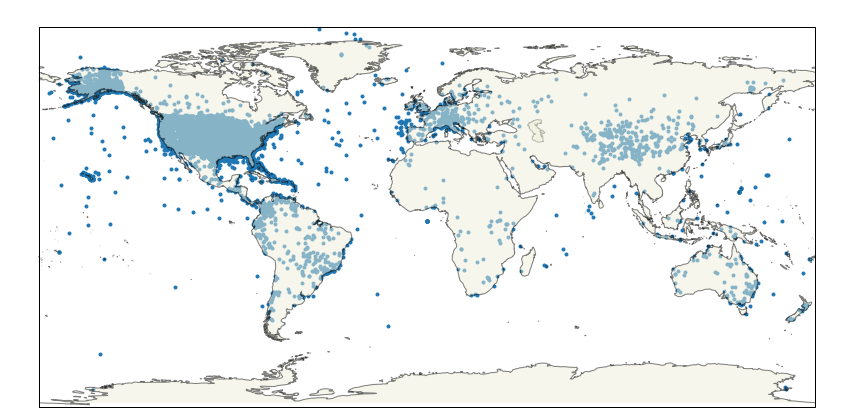

In [6]:
display.display(fig)

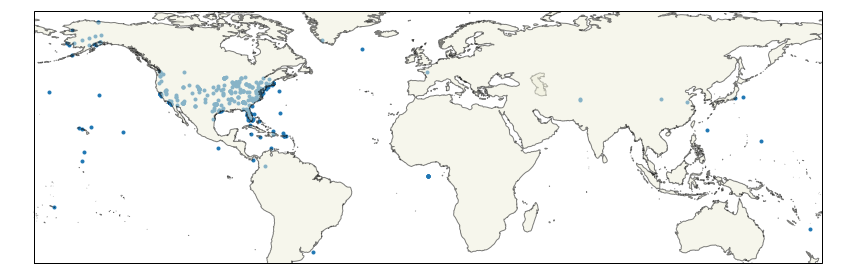

In [7]:
fig = plt.figure(figsize=(15,20))
# Elegimos la proyección PlateCarree
ax2 = plt.axes(projection=ccrs.PlateCarree())
# Y representamos las líneas de costa
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='50m')
ax2.add_feature(coastline, facecolor=cfeature.COLORS['land'], edgecolor='k', alpha=0.5)

ax2.scatter(aircraft_events_all[cond_accd & cond_far].longitude,
                aircraft_events_all[cond_accd & cond_far].latitude, 
                marker = '.')

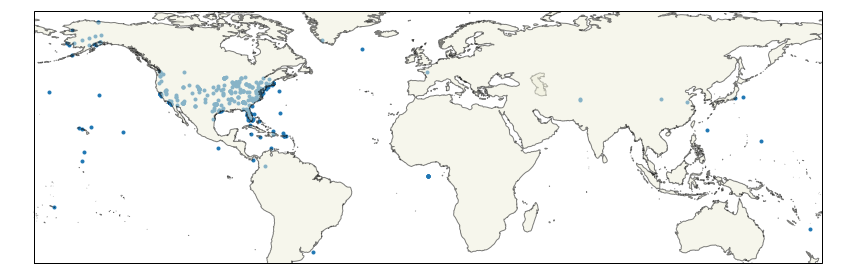

In [8]:
display.display(fig)

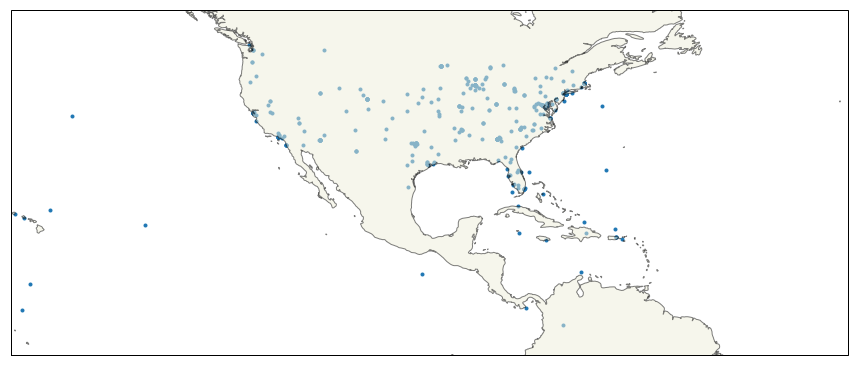

In [9]:
fig = plt.figure(figsize=(15,20))
# Elegimos la proyección PlateCarree
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent([-160, -30,30, 0], ccrs.Geodetic())
# Y representamos las líneas de costa
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='50m')
ax3.add_feature(coastline, facecolor=cfeature.COLORS['land'], edgecolor='k', alpha=0.5)

ax3.scatter(aircraft_events_all[cond_accd & cond_far].longitude,
                aircraft_events_all[cond_accd & cond_far].latitude, 
                marker = '.');

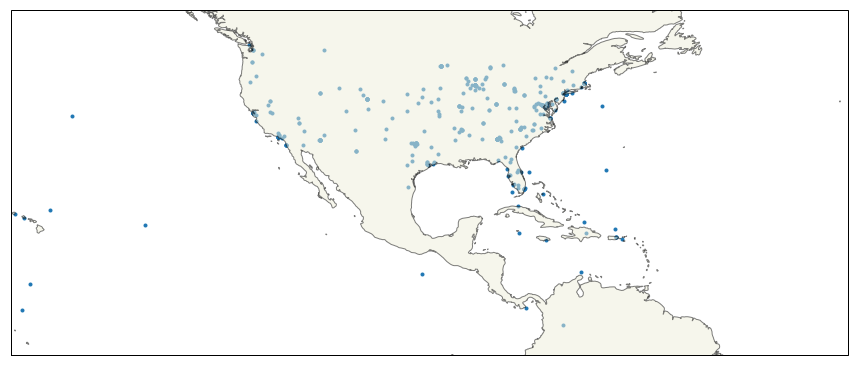

In [10]:
display.display(fig)

## Which phase of flight is the safest? 

<img src="./images/phase_of_flight.jpg" style="width: 800px;"/>

In [11]:
aircraft_with_phase = aircraft[aircraft.phase_flt_spec_gross != 0]

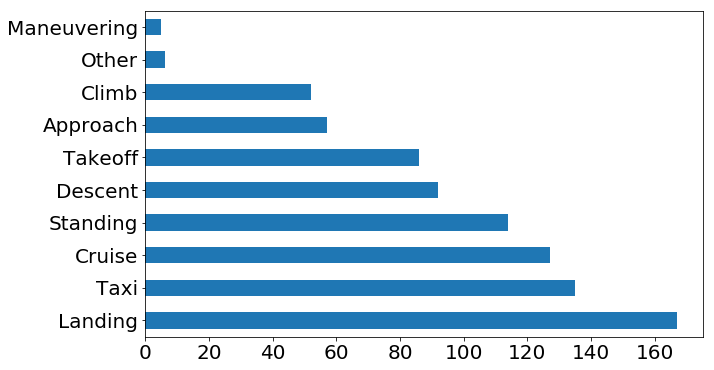

In [12]:
aircraft_with_phase.phase_flt_spec_gross.value_counts()[:10].plot(kind='barh');

In [13]:
try:
    # Just in case it was created before
    aircraft.damage.cat.add_categories('TOTAL', inplace=True)
except ValueError:
    pass

damage_per_phase = pd.crosstab(aircraft_with_phase.phase_flt_spec_gross,
                               aircraft.damage)
damage_per_phase['TOTAL'] = damage_per_phase.sum(axis=1)
damage_per_phase.sort_values('TOTAL', inplace=True, ascending=False)

damage_per_phase.iloc[:10,:5 ]

damage,DEST,MINR,NONE,SUBS,UNK
phase_flt_spec_gross,,,,,
Landing,14,5,5,143,0
Taxi,1,19,27,87,1
Cruise,4,13,94,16,0
Standing,2,22,41,49,0
Descent,5,6,79,2,0
Takeoff,23,4,4,55,0
Approach,17,5,15,20,0
Climb,3,2,29,18,0
Other,0,0,2,4,0


## What happens to the aircraft in each phase of flight? 

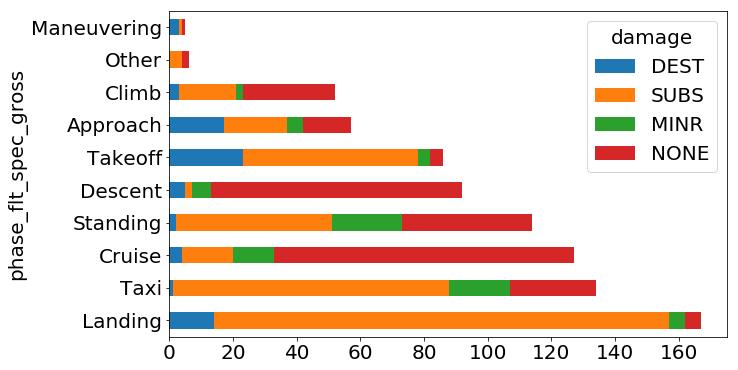

In [14]:
damage_per_phase.loc[damage_per_phase.index[:10], ['DEST', 'SUBS', 'MINR', 'NONE']].plot.barh(stacked=True);

<center><img src="./images/crash-boston-logan.jpg" style="width: 600px;"/></center>

<center><img src="./images/crash-2.jpg" style="width: 600px;"/></center>

## What happens to people?

In [15]:
# f: fatal
# m: medium
# n: none
# s: serious
# t: f+s+m

# TODO: borrar injuries
injury_types = ['inj_tot_f', 'inj_tot_s', 'inj_tot_m', 'inj_tot_n', 'inj_tot_t']

aircraft_2 = aircraft_with_phase.join(events, on='ev_id', how='inner', rsuffix='e')

injuries_per_phase = aircraft_2[injury_types + ['phase_flt_spec_gross']].groupby('phase_flt_spec_gross').sum()
injuries_per_phase.sort_values('inj_tot_t', inplace=True, ascending=False)
injuries_per_phase = injuries_per_phase.iloc[:10]
injuries_per_phase['inj_tot_s+m'] = injuries_per_phase['inj_tot_s'] + injuries_per_phase['inj_tot_m']
injuries_per_phase

,inj_tot_f,inj_tot_s,inj_tot_m,inj_tot_n,inj_tot_t,inj_tot_s+m
phase_flt_spec_gross,,,,,,
Takeoff,857.0,120.0,382.0,6266.0,1359.0,502.0
Cruise,367.0,159.0,670.0,14198.0,1196.0,829.0
Landing,195.0,153.0,599.0,11018.0,947.0,752.0
Approach,522.0,65.0,74.0,2375.0,661.0,139.0
Climb,370.0,42.0,94.0,4895.0,506.0,136.0
Descent,89.0,105.0,212.0,9450.0,406.0,317.0
Standing,12.0,65.0,196.0,9675.0,273.0,261.0
Taxi,14.0,45.0,201.0,13961.0,260.0,246.0
Maneuvering,72.0,4.0,3.0,165.0,79.0,7.0


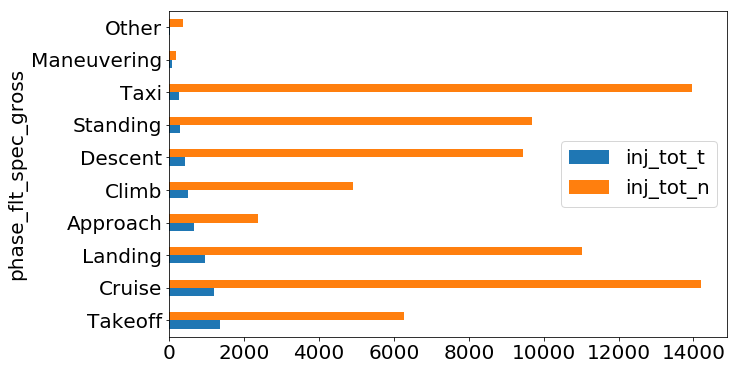

In [16]:
injuries_per_phase[['inj_tot_t', 'inj_tot_n']].plot.barh();

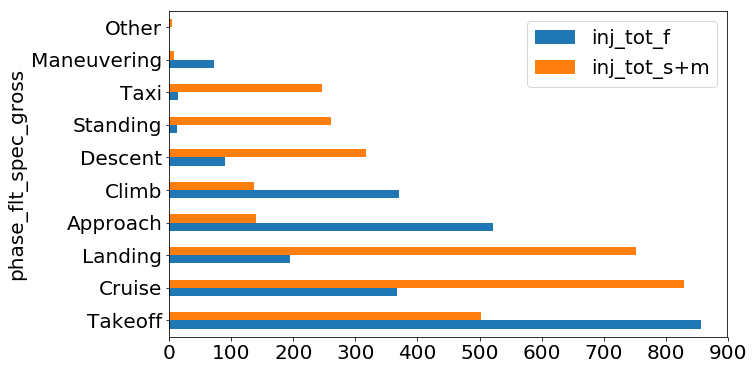

In [17]:
injuries_per_phase[['inj_tot_f', 'inj_tot_s+m']].plot.barh();

## What kind of events occur?

In [18]:
try:
    occurrences.phase_flt_spec_gross.cat.add_categories('TOTAL', inplace=True)
except ValueError:
    pass

phases_per_occurence = pd.crosstab(occurrences.Occurrence_Code, occurrences.phase_flt_spec_gross)
phases_per_occurence['TOTAL'] = phases_per_occurence.sum(axis=1)
phases_per_occurence.sort_values('TOTAL', inplace=True, ascending=False)
phases_per_occurence.iloc[:10].iloc[:, 1:-1]

phase_flt_spec_gross,Taxi,Takeoff,Climb,Cruise,Descent,Approach,Landing,Maneuvering,Other,Unknown
Occurrence_Code,,,,,,,,,,
In flight encounter with weather,0,2,19,98,71,14,2,0,0,0
On ground/water collision with object,95,11,0,0,0,1,31,0,3,0
Miscellaneous/other,16,7,6,14,11,1,6,3,5,1
Airframe/component/system failure/malfunction,9,27,21,15,7,18,14,0,1,0
In flight collision with terrain/water,0,13,0,3,19,5,18,3,0,0
In flight collision with object,0,10,1,4,1,15,3,1,0,0
Loss of control - in flight,0,15,1,5,4,7,2,0,0,0
Hard landing,0,0,0,0,0,0,33,0,0,0
Fire,1,5,3,5,2,3,5,0,0,0


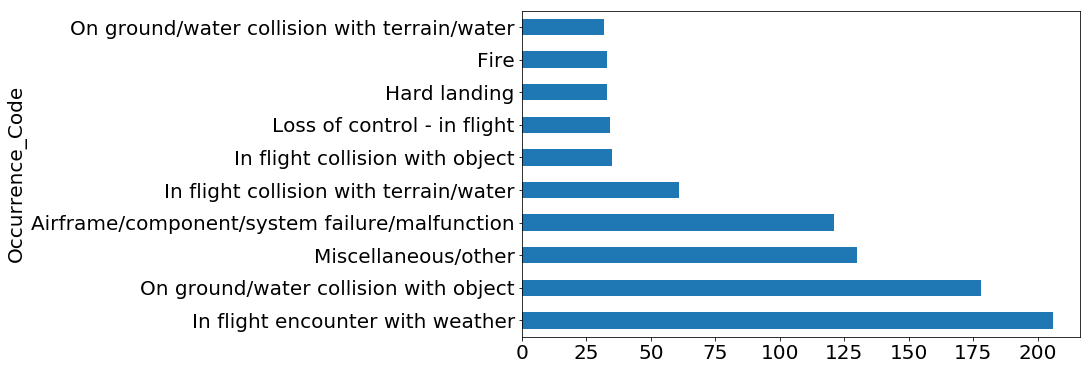

In [19]:
phases_per_occurence.iloc[:10].loc[:, 'TOTAL'].plot.barh();

<center><img src="./images/hail.JPG" style="width: 600px;"/></center>

<center><img src="./images/ice.JPG" style="width: 600px;"/></center>

## When do they occur?

In [20]:
aux = occurrences.Occurrence_Code.value_counts().iloc[0:10]
aux
occurrences_red = occurrences[occurrences['Occurrence_Code'].isin(aux.index)]

occurrences_per_phase = pd.crosstab(occurrences_red.phase_flt_spec_gross, occurrences_red.Occurrence_Code)
occurrences_per_phase = occurrences_per_phase.loc[['Standing', 'Taxi', 'Takeoff', 'Climb', 'Cruise', 'Descent', 'Approach',
       'Landing', 'Maneuvering']]

occurrences_per_phase

Occurrence_Code,Airframe/component/system failure/malfunction,Fire,Hard landing,In flight collision with object,In flight collision with terrain/water,In flight encounter with weather,Loss of control - in flight,On ground/water collision with object,On ground/water collision with terrain/water,Miscellaneous/other
phase_flt_spec_gross,,,,,,,,,,
Standing,9,9,0,0,0,0,0,37,0,60
Taxi,9,1,0,0,0,0,0,95,4,16
Takeoff,27,5,0,10,13,2,15,11,7,7
Climb,21,3,0,1,0,19,1,0,0,6
Cruise,15,5,0,4,3,98,5,0,0,14
Descent,7,2,0,1,19,71,4,0,0,11
Approach,18,3,0,15,5,14,7,1,0,1
Landing,14,5,33,3,18,2,2,31,20,6
Maneuvering,0,0,0,1,3,0,0,0,0,3


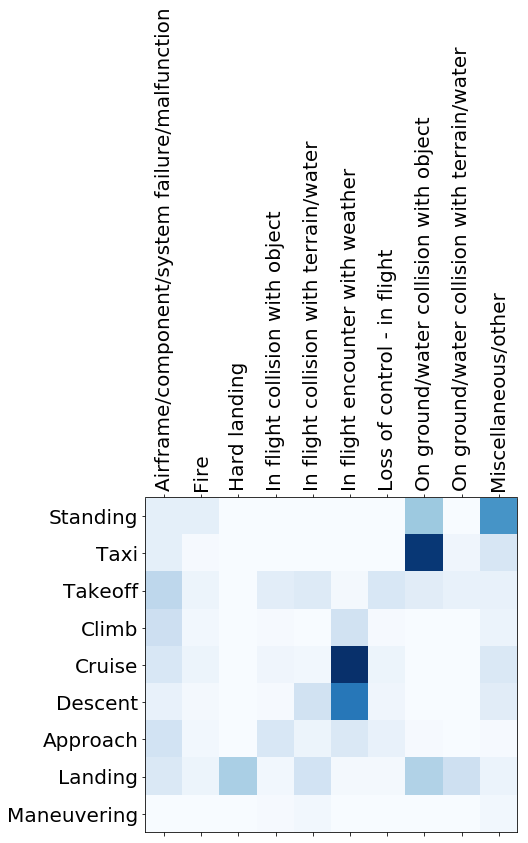

In [21]:
plt.figure(figsize=(20, 20))
occurrences_per_phase_ = occurrences_per_phase.iloc
plt.matshow(occurrences_per_phase.values, cmap=plt.cm.Blues)
plt.xticks(np.arange(occurrences_per_phase.shape[1]),
           occurrences_per_phase.columns.tolist(),
           rotation='vertical')
plt.yticks(np.arange(occurrences_per_phase.shape[0]),
           occurrences_per_phase.index.tolist());


## Which occurrence causes more victims? 

In [22]:
occurrences_ = pd.merge(occurrences, events, left_on='ev_id', right_index=True)

inj_cols = ['inj_tot_f', 'inj_tot_s', 'inj_tot_m', 'inj_tot_n', 'inj_tot_t']

inj_per_occ = occurrences_.groupby('Occurrence_Code')[inj_cols].sum()
inj_per_occ.sort_values('inj_tot_t', inplace=True, ascending=False)

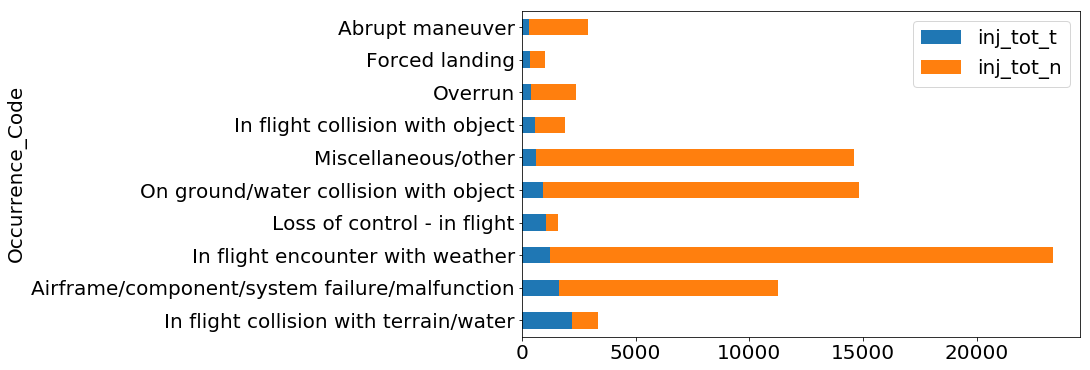

In [23]:
inj_per_occ.loc[inj_per_occ.index[:10], ['inj_tot_t', 'inj_tot_n']].plot.barh(stacked=True);

In [24]:
inj_per_occ['inj_tot_s+m'] = inj_per_occ['inj_tot_s'] + inj_per_occ['inj_tot_m']

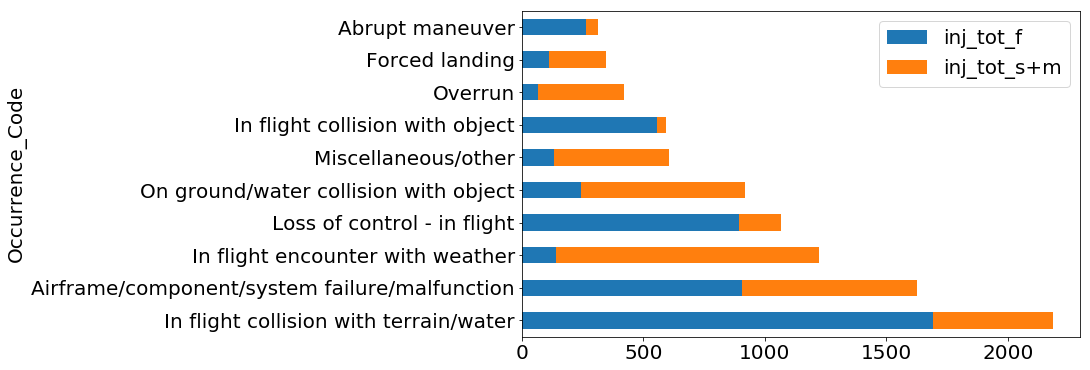

In [25]:
inj_per_occ.loc[inj_per_occ.index[:10], ['inj_tot_f', 'inj_tot_s+m']].plot.barh(stacked=True);

## Which one is more destructive for the plane? 

In [26]:
try:
    aircraft.damage.cat.add_categories(['TOTAL'], inplace=True)
except ValueError:
    pass

damage_per_Occurrence = pd.crosstab(occurrences.Occurrence_Code, aircraft.damage)
damage_per_Occurrence['TOTAL'] = damage_per_Occurrence.sum(axis=1)
damage_per_Occurrence.sort_values('TOTAL', inplace=True, ascending=False)
damage_per_Occurrence.head()

damage,,DEST,MINR,NONE,SUBS,UNK,TOTAL
Occurrence_Code,,,,,,,
In flight encounter with weather,0,14,17,77,84,0,192
On ground/water collision with object,1,14,9,58,85,0,167
Miscellaneous/other,0,10,12,50,53,0,125
Airframe/component/system failure/malfunction,0,10,11,39,58,0,118
In flight collision with terrain/water,0,3,8,20,25,0,56


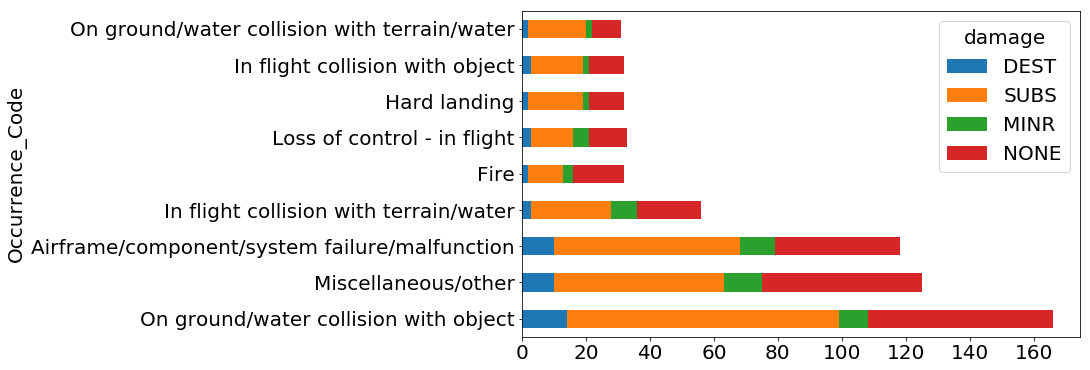

In [27]:
damage_per_Occurrence.loc[damage_per_Occurrence.index[1:10], ['DEST', 'SUBS', 'MINR', 'NONE']].plot.barh(stacked=True);

## influence of fire

In [28]:
def tot_events_and_mean_injuries_by_factor(factor):
    ac_ = aircraft_2[[
    'ev_id',
    'inj_tot_f', 'inj_tot_m', 'inj_tot_n', 'inj_tot_s', 'inj_tot_t',
    'apt_dist', 'apt_dir', 'light_cond', 'sky_cond_nonceil',
    'gust_ind', 'gust_kts',
    'damage', 'acft_fire', 'acft_expl', 'acft_make', 'acft_model', 'acft_category',
    'afm_hrs', 'afm_hrs_last_insp', 'num_eng', 'far_part', 
    ]]
    
    gby = ac_.groupby([factor])
    r = gby.agg({'ev_id': 'count',
                 'inj_tot_f':'mean',
                 'inj_tot_m':'mean',
                 'inj_tot_n':'mean',
                 'inj_tot_s':'mean',
                 'inj_tot_t':'mean'}
           )
    
    if factor in ('acft_fire', 'acft_expl'):
        r = r.loc[['GRD ', 'IFLT', 'NONE', 'UNK ']]
    elif factor in ('gust_ind'):
        r = r.loc[['N', 'Y']]
    
    return r.loc[:, ['ev_id', 'inj_tot_f']]

# EN acft_fire u acft_expl drop blaco y BOTH
# EN gust_ind drop blanco
# EVALUAR light_cond y sky_con_nonceil


In [29]:
tot_events_and_mean_injuries_by_factor('acft_fire')

,ev_id,inj_tot_f
acft_fire,,
GRD,93,37.512821
IFLT,18,47.500000
NONE,910,6.684211
UNK,25,66.714286


In [30]:
gby_year = events.groupby(events.ev_date.dt.year)

injured_per_year = gby_year[['inj_tot_f', 'inj_tot_s', 'inj_tot_m']].sum()

injured_per_year.tail()

,inj_tot_f,inj_tot_s,inj_tot_m
ev_date,,,
2013,9.0,7.0,10.0
2014,NaN,14.0,27.0
2015,NaN,20.0,39.0
2016,NaN,8.0,26.0
2017,NaN,4.0,1.0


## Does the age of the pilot affect? 

In [31]:
flight_crew = get_flight_crew_accidents(con)

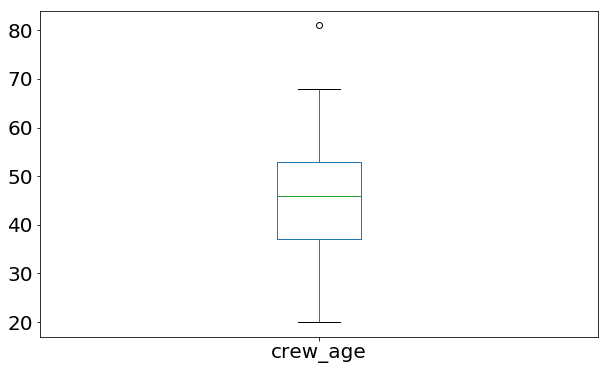

In [32]:
flight_crew.crew_age.plot(kind='box');

<center><img src="./images/commercial-pilots-1.jpg" style="width: 700px;"/></center>

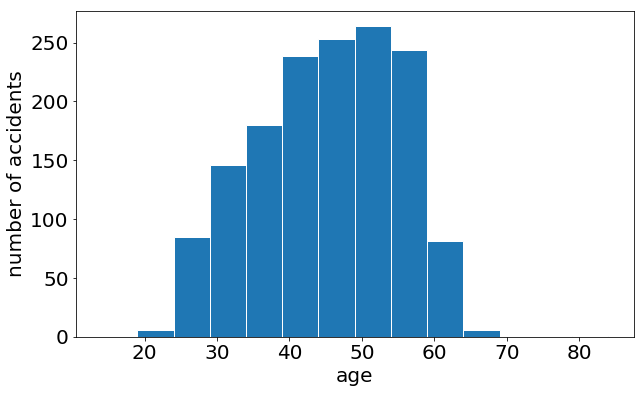

In [33]:
age_bins = np.arange(14, 85, 5)
flight_crew['crew_age'].hist(bins=age_bins, ec='white', grid=False)
plt.xlabel('age')
plt.ylabel('number of accidents');

Active FAA Pilot Certificates Held by Category and Age Group of Holder  according to [GAMMA databook](http://www.gama.aero/files/GAMA_2015_Databook_LoRes%20updated%203-29-2016.pdf http://www.gama.aero/media-center/industry-facts-and-statistics/statistical-databook-and-industry-outlook#year2015)

In [34]:
licenses_by_age_airline = np.array([0, 572, 5199, 12003, 15507,
                                                          18337, 23058, 25882, 24220, 16824,
                                                          10184, 4284, 1766, 787])

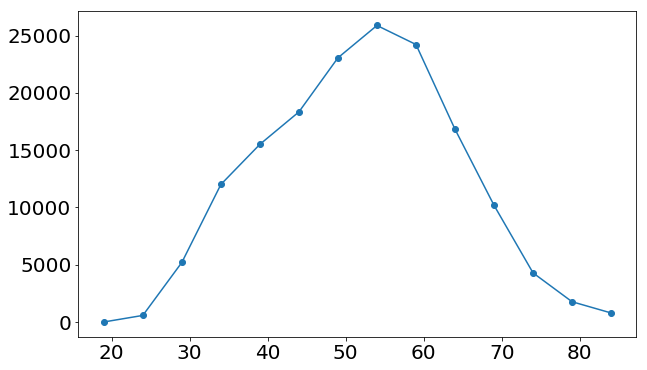

In [35]:
plt.plot(age_bins[1:], licenses_by_age_airline, 'o-');

In [36]:
age_group = pd.cut(flight_crew['crew_age'], age_bins)
gby_age = flight_crew['ev_id'].groupby(age_group).count()

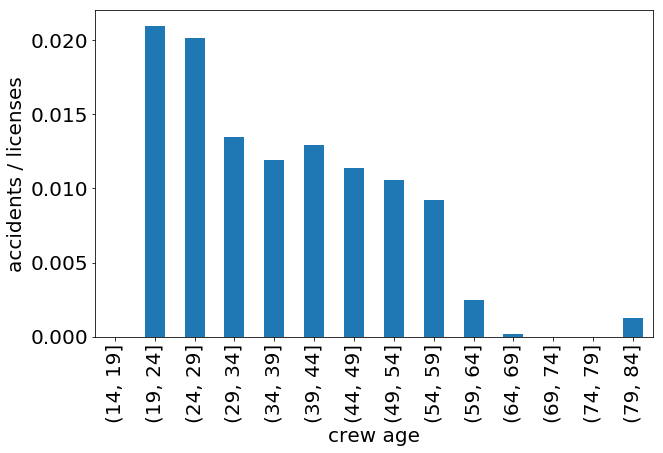

In [37]:
accident_rate_age = gby_age / licenses_by_age_airline
accident_rate_age.plot.bar()
plt.ylabel('accidents / licenses')
plt.xlabel('crew age');

It seems that some people have investigated this issue before:
> [...] the accident rate of airline transport rated (ATR) pilots aged 55–59 is approximately one-third of that of pilots with the same rating who are aged 20–24.

Handbook of Aviation Human Factors, Second Edition. John A. Wise,V. David Hopkin,Daniel J. 

## Is flying safer now than before? 

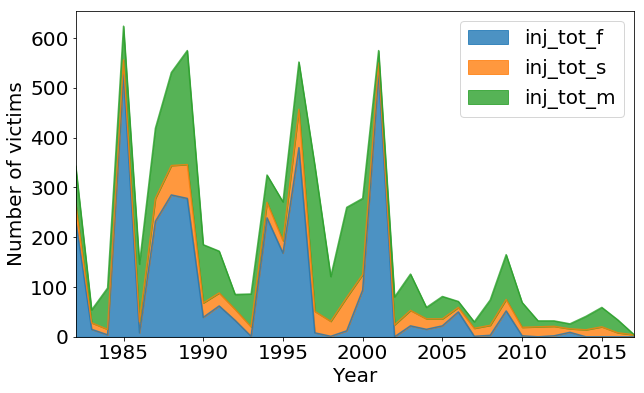

In [38]:
injured_per_year.plot.area(alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of victims');

In [39]:
passengers = pd.read_csv('./data/annual_passengers_carried_data.csv', nrows=1, usecols=range(4,60))
passengers = passengers.transpose()
# renaming column
passengers.columns = ['passengers']
gby_year = events.groupby(events.ev_date.dt.year)

injured_per_year = gby_year[['inj_tot_f', 'inj_tot_s', 'inj_tot_m']].sum()

injured_per_year.tail()
# parsing date in index 
passengers.index = pd.to_datetime(passengers.index.str[:4])
# converting flight number to number
passengers['passengers'] = pd.to_numeric(passengers['passengers'], errors='coerce') / 1e6
passengers.index = passengers.index.year

In [40]:
flights = pd.read_csv('data/API_IS.AIR.DPRT_DS2_en_csv_v2/API_IS.AIR.DPRT_DS2_en_csv_v2.csv', skiprows=4)
flights = flights[flights['Country Name'] == 'United States']

flights = flights.iloc[:, 5:-1].T
flights.index = pd.to_numeric(flights.index)
flights = flights / 1e6

flights.columns = ['flights']

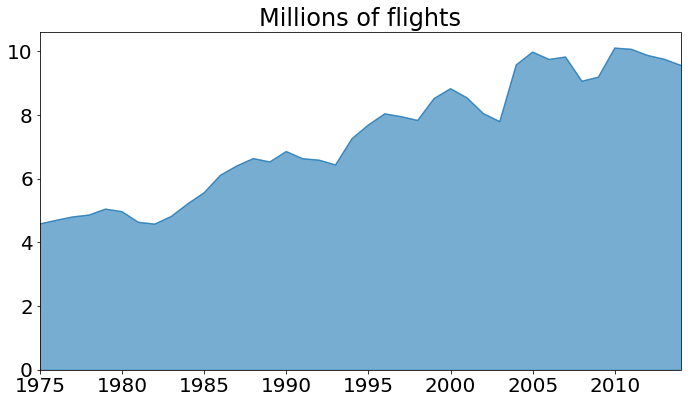

In [41]:
fig, ax = plt.subplots(1, 1)
# ax[0].set_title('Millions of passengers transported')
# passengers['passengers'].plot.area(ax=ax[0], alpha=0.6, color="#0072B2")
# ax[0].set_xlim(1975, 2014)

ax.set_title('Millions of flights')
flights.plot.area(ax=ax, alpha=0.6, legend=False)
ax.set_xlim(1975, 2014)

plt.tight_layout()

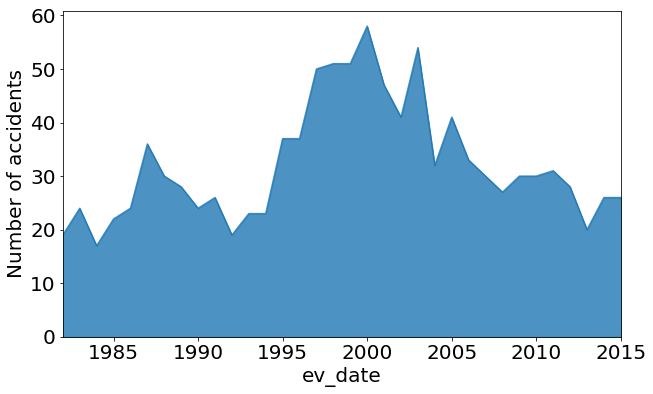

In [42]:
accidents_gby_year = events.groupby(events.ev_date.dt.year).ntsb_no.count()
ax = accidents_gby_year.plot.area(alpha=0.8,)
ax.set_xlim(1982, 2015)

ax.set_ylabel('Number of accidents');

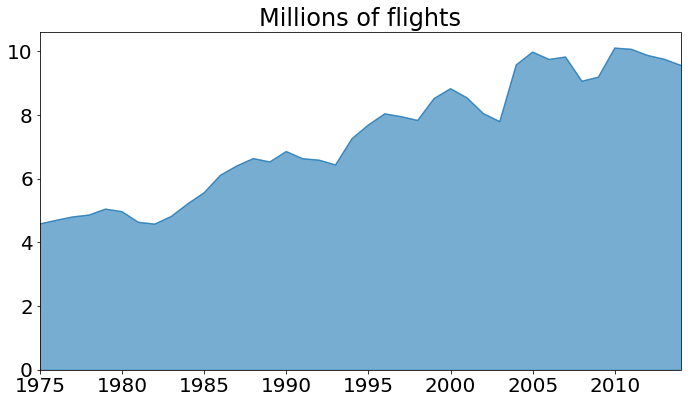

In [43]:
display.display(fig)

In [44]:
accident_rate = accidents_gby_year / flights.flights
accident_rate.tail()

2013    2.052230
2014    2.720711
2015    2.737860
2016    1.661170
2017         NaN
dtype: float64

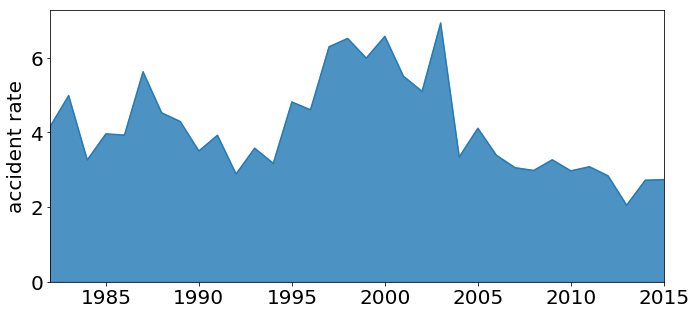

In [45]:
ax = accident_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2015)
ax.set_ylabel('accident rate');

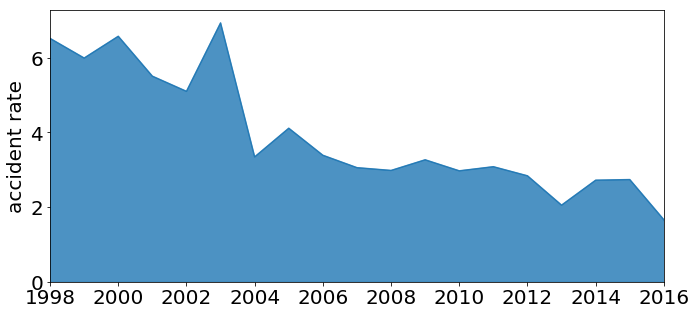

In [46]:
ax = accident_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1998, 2016)
ax.set_ylabel('accident rate');

## Official global numbers

According to [EASA](https://www.easa.europa.eu/) in 2016:
* Airline fatal accident rate: ~0.6 fatal accidentes / 1 Million flights
* Airline non-fatal accident rate: ~4.4 non-fatal accidents / 1 Million flights

https://www.easa.europa.eu/system/files/dfu/209735_EASA_ASR_MAIN_REPORT_2.0.pdf

## What can be done to keep improving? 

<center><img src="images/data4safety.png" width=1000px></center>

Collecting and gathering all data that may support the management of safety risks
  - safety reports
  - flight data (i.e. data generated by the aircraft via the Flight Data Recorders)
  - surveillance data (air traffic data),
  - weather data
  - ...

## About the process

* Data analysis process is not a bed of roses
* Getting the data is hard! thank you NTSB!
* Cleaning data is time consumming: missing and wrong values, parsing process...

* But pandas helps a lot!

<center><img src="images/pandas_help.jpeg" width=400px></center>

# Thank you!

<center><img src="images/pydata-logo-warsaw-2017.png" width=1000px></center>


###### Jesús Martos & Alejandro Sáez

In [47]:
# preserve
from IPython.core.display import HTML
css_file = 'styles/style.css'
HTML(open(css_file, "r").read())